In [2]:
import os
os.environ["PATH"]

'/Users/chris/.pyenv/versions/3.11.1/bin:/opt/homebrew/Cellar/pyenv/2.5.4/libexec:/opt/homebrew/Cellar/pyenv/2.5.4/plugins/python-build/bin:/opt/miniconda3/condabin:/Users/chris/.pyenv/shims:/Users/chris/Developer/google-cloud-sdk/bin:/Users/chris/.nvm/versions/node/v18.16.0/bin:/Users/chris/Developer/emsdk:/Users/chris/Developer/emsdk/upstream/emscripten:/opt/homebrew/bin:/opt/homebrew/sbin:/opt/local/bin:/opt/local/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/Library/Apple/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Applications/iTerm.app/Contents/Resources/utilities:/Users/chris/Developer/emsdk:/Users/chris/Developer/emsdk/upstream/emscripten'

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

In [4]:
data = np.loadtxt('mt1-results.csv', delimiter=',', dtype=int, skiprows=1)

/var/folders/bj/9wnh5n4x1xj7blcxps0xf9qh0000gn/T/ipykernel_84792/454881709.py:1: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  data = np.loadtxt('mt1-results.csv', delimiter=',', dtype=int, skiprows=1)


In [5]:
data

array([[  8000,     10,      0,      0,      0,      0,     10,      0,
             0,      0,      0],
       [ 30000,     10,      0,      0,      7,      0,     10,      0,
             8,      0,      0],
       [ 80000,     10,      0,      0,     10,      0,     10,      0,
            10,      0,      0],
       [200000,     10,      0,     10,     10,      3,     10,      0,
             0,      0,      0],
       [400000,     10,      0,     10,     10,      0,     10,      0,
            10,     10,      0]])

In [6]:
nsteps = data[:,0]

In [7]:
nsteps

array([  8000,  30000,  80000, 200000, 400000])

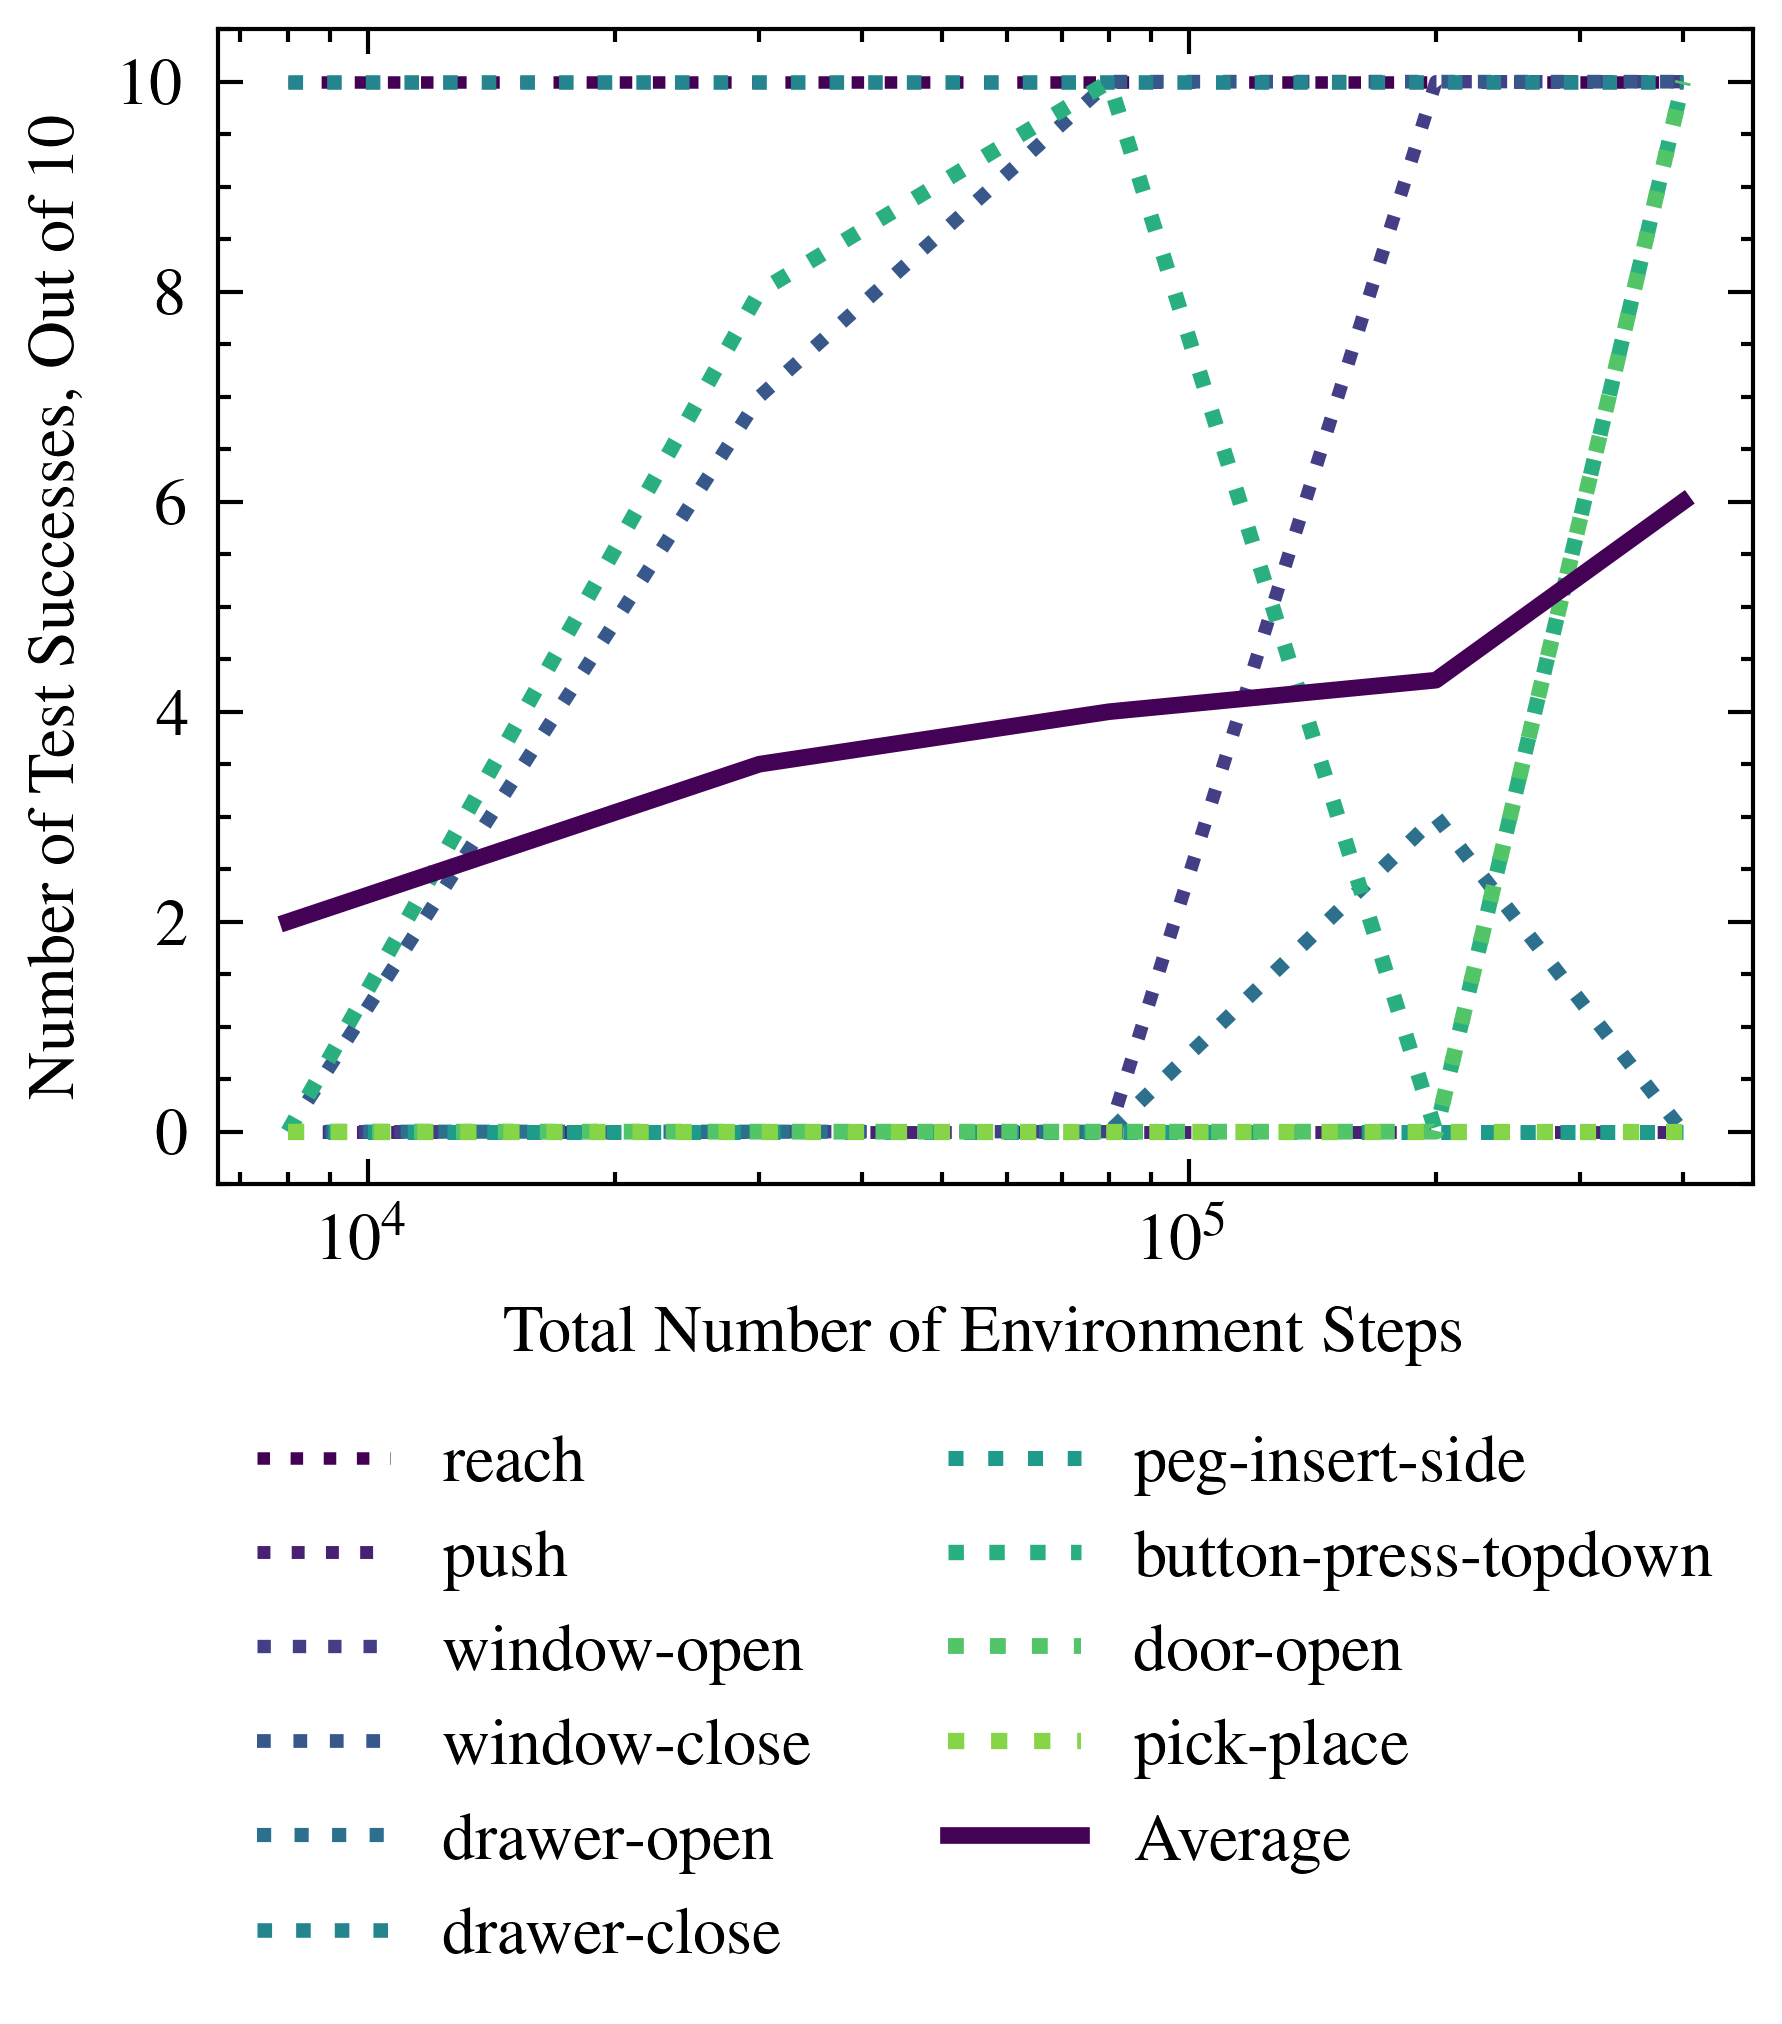

In [18]:
plt.style.use(['science', 'ieee'])

for (idx, skill) in enumerate(["reach", "push", "window-open", "window-close", 
                     "drawer-open", "drawer-close", "peg-insert-side",
                     "button-press-topdown", "door-open", "pick-place"]):
    results = data[:,idx+1]
    plt.plot(nsteps, results, label=skill, color=plt.cm.viridis(idx / 11), linestyle=":", lw=1.5+0.05*idx, alpha=1.0)
plt.plot(nsteps, np.mean(data[:,1:], axis=1), label="Average", color=plt.cm.viridis(1), lw=2)
plt.xlabel('Total Number of Environment Steps')
plt.ylabel('Number of Test Successes, Out of 10')
plt.xscale('log')
plt.legend(bbox_to_anchor=(0.5, -0.73), loc='lower center', ncol=2)
plt.savefig('individual-mt10-curve')
plt.show()

<Figure size 1980x1500 with 0 Axes>